# Financial Services Use In Tanzania


In [1]:
# loading modules
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#### 1. Examine the dataset. Are there any missing observations or columns where the data do not seem valid?

In [15]:
# reading csv
mob_mon= pd.read_csv('resources/training.csv')
mob_mon.info()

#missing values
missing_values = mob_mon.isnull().sum().sum()
print('\nNumber of missing values:',missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

#### 2. Get basic descriptive statistics for the dataset.

In [3]:
# Renaming all columns I am required to work with.

mob_mon = mob_mon.rename(columns={'Q1':'age','Q2':'gender','Q3':'marital_status','Q6':'land_ownership'})

mob_mon = mob_mon.rename(columns = {
    "Q8_1":'Salaries/wages',
    "Q8_2":'trading/selling',
    "Q8_3":'service',
    "Q8_4":'Piece work/Casual labor/Occasional jobs',
    "Q8_5":'Rental income',
    "Q8_6":'Interest',
    "Q8_7":'Pension',
    "Q8_8":'Social welfare money/grant from Government',
    "Q8_9":'Rely on someone',
    "Q8_10":'Don’t get money',
    "Q8_11": 'Other'
})

In [4]:
# Getting descriptive stats on my dataset.
mob_mon = mob_mon.drop(['ID'], axis=1)
summary = mob_mon.describe()
summary = summary.transpose()
summary.head()

,count,mean,std,min,25%,50%,75%,max
age,7094.0,38.239498,16.332148,16.0,25.0,35.0,48.0,100.0
gender,7094.0,1.559910,0.496433,1.0,1.0,2.0,2.0,2.0
marital_status,7094.0,1.787426,1.165160,1.0,1.0,1.0,3.0,4.0
Q4,7094.0,3.060051,1.557779,1.0,2.0,3.0,3.0,8.0
Q5,7094.0,2.548915,1.534257,1.0,1.0,3.0,4.0,6.0


In [9]:
# Changed values to male and female
mob_mon.gender= ['male' if each == 1 else 'female' for each in mob_mon.gender]

# Checking the number of entries for males:
males = mob_mon[mob_mon.gender == 'male']
m1 = len(males[males.mobile_money == 1])
m2 = len(males[males.mobile_money == 0]) 
m = m1 + m2
print('Total number of males:',m)
print('Males with Mobile Money:',m1)
print('Males without Mobile Money:',m2,)

# Checking the number of entries for males:
females = mob_mon[mob_mon.gender == 'female']
f1 = len(females[females.mobile_money == 1])
f2 = len(females[females.mobile_money == 0])
f = f1 + f2
print('\nTotal number of females:',f)
print('Females with Mobile Money:',f1)
print('Females without Mobile Money:',f2)

# Checking the youngest & oldest entrant in the database. 
youngest = mob_mon[mob_mon.age.notnull()].sort_values('age')[['gender','age']].head(1)
oldest = mob_mon[mob_mon.age.notnull()].sort_values('age')[['gender','age']].tail(1)

print('\nThe youngest is ', youngest.gender.values, youngest.age.values)
print('the oldest is: ', oldest.gender.values, oldest.age.values)

Total number of males: 0
Males with Mobile Money: 0
Males without Mobile Money: 0

Total number of females: 7094
Females with Mobile Money: 3930
Females without Mobile Money: 3164

The youngest is  ['female'] [16]
the oldest is:  ['female'] [100]


#### 3. Create appropriate graphs to visually represent the relationship between financial services accessed (non, momible, both) and age, gender, marital status, land ownership and type of income.

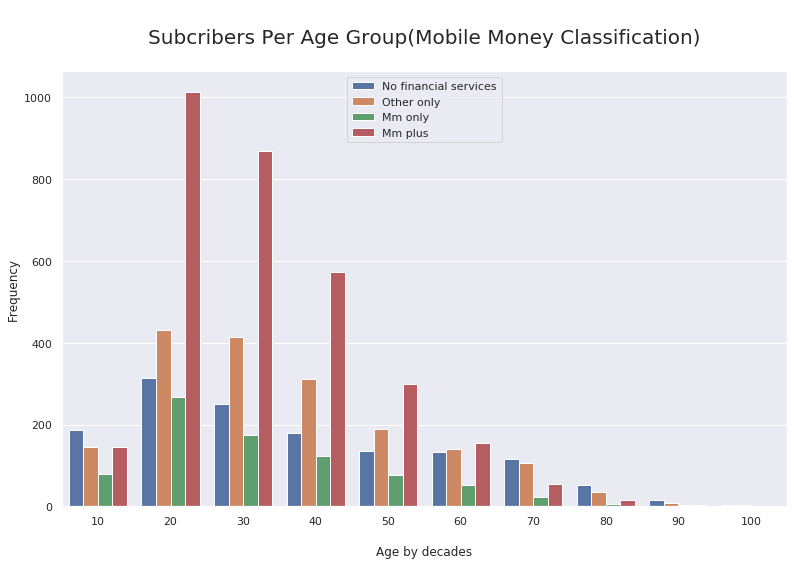

In [10]:
# Comparing Mobile Money Classification with Age.

sns.set()
mob_mon['Age_by_decades'] = mob_mon.age.apply(lambda x : int(x/10) * 10)
plt.figure(figsize = (13,8))
sns.countplot(x = 'Age_by_decades', hue = 'mobile_money_classification', data = mob_mon)
plt.title('\nSubcribers Per Age Group(Mobile Money Classification)\n',fontsize=20)
plt.xlabel('\nAge by decades')
plt.ylabel('Frequency')
plt.legend(['No financial services', 'Other only', 'Mm only', 'Mm plus'])
plt.show()

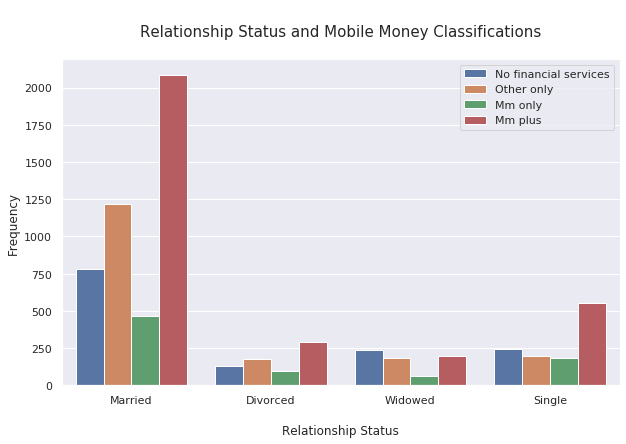

In [11]:
# Comparing Mobile Money Classification with Marital Status.

sns.set()
plt.figure(figsize = (10,6))
sns.countplot(x = 'marital_status', hue = 'mobile_money_classification', data = mob_mon)
plt.title('\nRelationship Status and Mobile Money Classifications\n', fontsize = 15)
plt.xlabel('\nRelationship Status')
plt.ylabel('Frequency')
plt.legend(['No financial services', 'Other only', 'Mm only', 'Mm plus'])
plt.xticks(np.arange(4), ['Married', 'Divorced', 'Widowed', 'Single'])
plt.show()

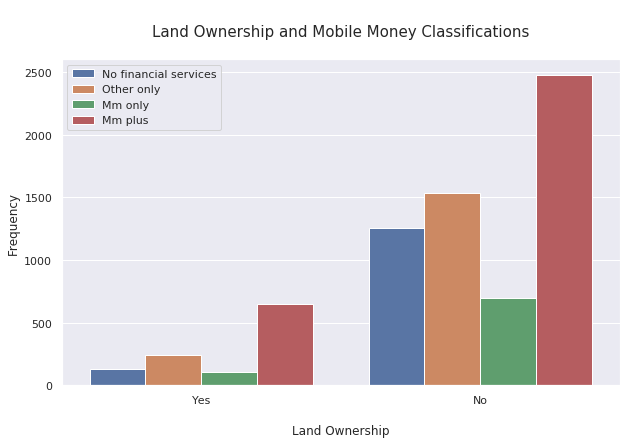

In [12]:
# Comparring Land ownership with Mobile Money Classification

sns.set()
plt.figure(figsize = (10,6))
sns.countplot(x = 'land_ownership', hue = 'mobile_money_classification',data = mob_mon)
plt.title('\nLand Ownership and Mobile Money Classifications\n', fontsize = 15)
plt.xlabel('\nLand Ownership')
plt.ylabel('Frequency')
plt.legend(['No financial services', 'Other only', 'Mm only', 'Mm plus'])
plt.xticks(np.arange(2), ['Yes', 'No'])
plt.show()

In [14]:
# Comparing Income Types and Mobile Money classifications



In [1]:
# For females
# Calculate piechart sizes
fmm = f1 / f * 100
fwmm = f2/f * 100

# Define the piechart
plt.figure(figsize=(10,5))
labels = ['With Mobile Money','Without Mobile Money']
sizes = [fmm,fwmm]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)

# piechart = mob_mon.groupby(mob_mon['Q1'])['mobile_money'].sum()
# plt.axis('equal')
# plt.pie(piechart, autopct='%1.1f%%')
# plt.title('Financial Services Accessed Based on Marital Status')
# plt.legend(title = 'Marital Status:', labels = ['Married','Divorced','Widowed','Single'], loc="best")
# plt.show()

# Plot the pie chart
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Piechart representing Females and use of Mobile money')

# For males
# Calculate piechart sizes
mmm = m1 / m * 100
mwmm = m2/m * 100

# Define the piechart
plt.figure(figsize=(10,5))
labels = ['With Mobile Money','Without Mobile Money']
sizes = [mmm,mwmm]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)

# Plot the pie chart
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Piechart representing Males and use of Mobile money')
plt.show()

NameError: name 'f1' is not defined

Text(0.5, 1.0, 'Relationship Status and Mobile Money')

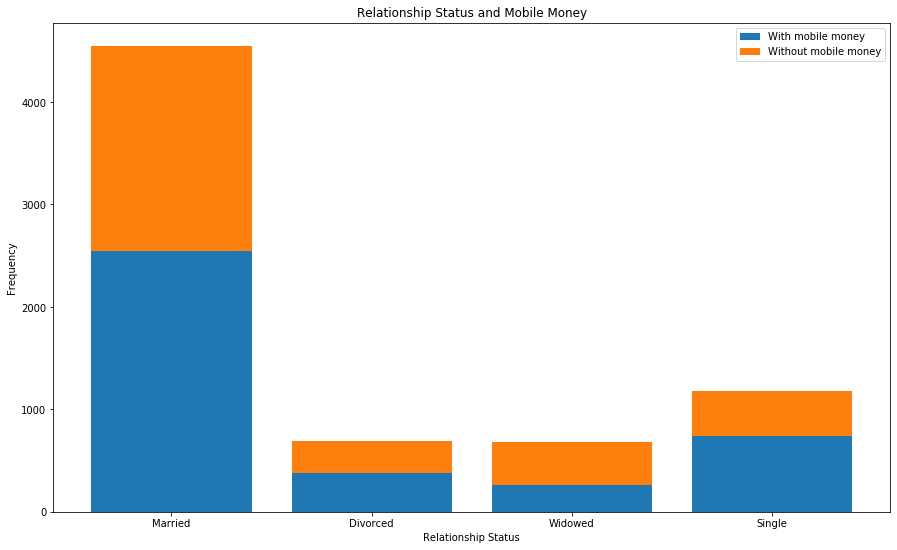

In [72]:
# Relationship status
married = mob_mon[mob_mon.Q3 == 1]
divorced = mob_mon[mob_mon.Q3 == 2]
widowed = mob_mon[mob_mon.Q3 == 3]
single = mob_mon[mob_mon.Q3 == 4]

# status on their Mobile Money
married_with = len(married[married.mobile_money == 1])
married_without = len(married[married.mobile_money == 0])

divorced_with = len(divorced[divorced.mobile_money == 1])
divorced_without = len(divorced[divorced.mobile_money == 0])

widowed_with = len(widowed[widowed.mobile_money == 1])
widowed_without = len(widowed[widowed.mobile_money == 0])

single_with = len(single[single.mobile_money == 1])
single_without = len(single[single.mobile_money == 0])

# sumation
relationship_with = [married_with, divorced_with, widowed_with, single_with]
relationship_without= [married_without, divorced_without, widowed_without, single_without]

#plotting the graph for relationship status and mobile money
plt.figure(figsize=(15,9))
plt.bar(np.arange(4), relationship_with, label='With mobile money')
plt.bar(np.arange(4), relationship_without, bottom= relationship_with, label='Without mobile money')
plt.xlabel('Relationship Status')
plt.ylabel('Frequency')
plt.xticks(np.arange(4), ['Married', 'Divorced', 'Widowed', 'Single'])
plt.legend(loc='upper right')
plt.title('Relationship Status and Mobile Money')

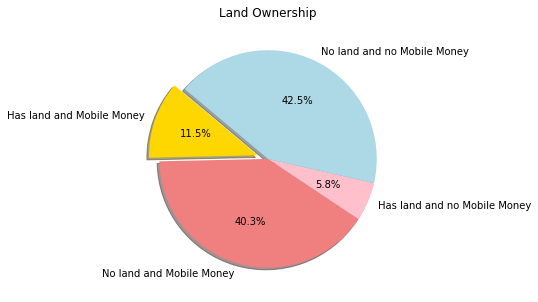

In [73]:
# Land ownership
has_land = mob_mon[mob_mon.Q6 == 1]
no_land = mob_mon[mob_mon.Q6 == 2]

# Land ownership and Mobile Money
has_land_mm = len(has_land[has_land.mobile_money == 1])
no_land_mm = len(no_land[no_land.mobile_money == 1]) 

has_land_wmm = len(has_land[has_land.mobile_money == 0])
no_land_wmm = len(no_land[no_land.mobile_money == 0])
total = has_land_mm + no_land_mm + has_land_wmm + no_land_wmm

# Plotting Land ownership and Mobile Money
# Calculate piechart sizes
lmm = has_land_mm / total * 100
nlwmm = no_land_mm / total * 100
llmm = has_land_wmm / total * 100
nnlwmm = no_land_wmm / total * 100

# Define the piechart
plt.figure(figsize=(10,5))
labels = ['Has land and Mobile Money','No land and Mobile Money','Has land and no Mobile Money','No land and no Mobile Money' ]
sizes = [lmm, mwmm, llmm,nnlwmm]
colors = ['gold', 'lightcoral', 'pink', 'lightblue']
explode = (0.1, 0, 0, 0)

# Plot the pie chart
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Land Ownership')
plt.show()

In [87]:
# Type of income
salaries = len(mob_mon[mob_mon.Q8_1 == 1])
no_salaries = len(mob_mon[mob_mon.Q8_1 == 0])

trading = len(mob_mon[mob_mon.Q8_2 == 1])
no_trading = len(mob_mon[mob_mon.Q8_2 == 0])

services = len(mob_mon[mob_mon.Q8_3 == 1])
no_services = len(mob_mon[mob_mon.Q8_3 == 0])

piece_work = len(mob_mon[mob_mon.Q8_4 == 1])
no_piece_work = len(mob_mon[mob_mon.Q8_4 == 0])

rental_income = len(mob_mon[mob_mon.Q8_5 == 1])
no_rental_income = len(mob_mon[mob_mon.Q8_5 == 0])

interest = len(mob_mon[mob_mon.Q8_6 == 1])
no_interest = len(mob_mon[mob_mon.Q8_6 == 0])

pension = len(mob_mon[mob_mon.Q8_7 == 1])
no_pension = len(mob_mon[mob_mon.Q8_7 == 0])

social_welfare = len(mob_mon[mob_mon.Q8_8 == 1])
no_social_welfare = len(mob_mon[mob_mon.Q8_8 == 0])

rely_on_someone = len(mob_mon[mob_mon.Q8_9 == 1])
dont_rely_on_someone = len(mob_mon[mob_mon.Q8_9 == 0])

dont_get_money = len(mob_mon[mob_mon.Q8_10 == 1])
get_money = len(mob_mon[mob_mon.Q8_10 == 0])

other = len(mob_mon[mob_mon.Q8_11 == 1])
no_other = len(mob_mon[mob_mon.Q8_11 == 0])


MM = [salaries, trading, services, piece_work, rental_income, interest, pension, 
      social_welfare, rely_on_someone, dont_get_money, other]
No_MM = [no_salaries, no_trading, no_services, no_piece_work, no_rental_income, no_interest, no_pension, 
         no_social_welfare, dont_rely_on_someone, get_money, no_other]

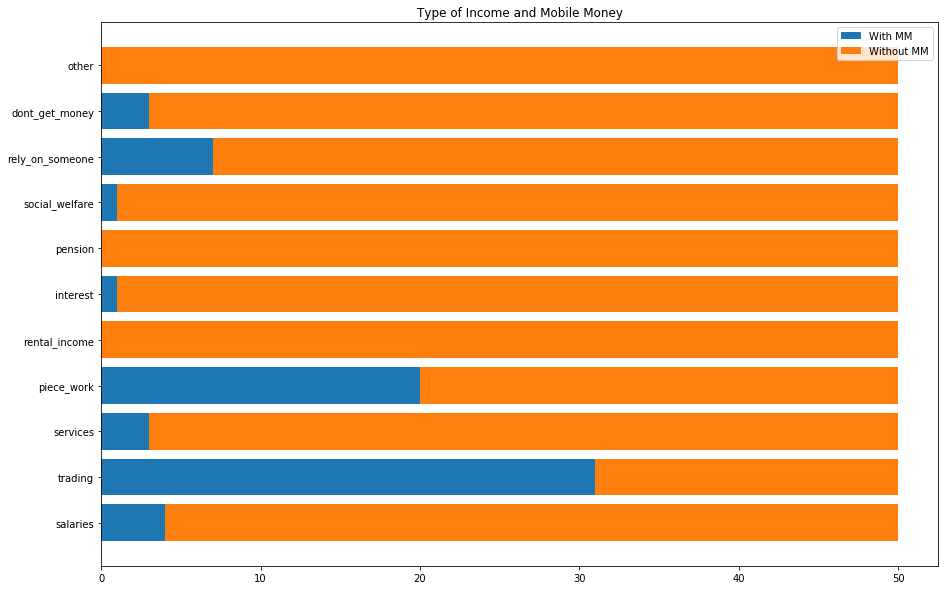

In [88]:
# Type of income
plt.figure(figsize=(15,10))
plt.barh(np.arange(11), MM, label='With MM')
plt.barh(np.arange(11), No_MM, left= MM, label='Without MM')
plt.yticks(np.arange(11), ['salaries', 'trading', 'services', 'piece_work', 'rental_income', 'interest', 'pension', 
      'social_welfare', 'rely_on_someone', 'dont_get_money', 'other'])
plt.legend(loc='upper right')
plt.title('Type of Income and Mobile Money')
plt.show()

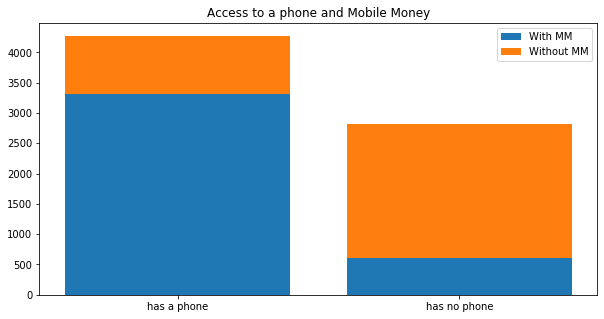

In [76]:
# Access to mobile money
with_phone = mob_mon[mob_mon.Q7 == 1]
no_phone = mob_mon[mob_mon.Q7 == 2]

# Summation
with_phone_MM = len(with_phone[with_phone.mobile_money == 1])
with_phone_wMM = len(with_phone[with_phone.mobile_money == 0])

no_phone_MM = len(no_phone[no_phone.mobile_money == 1])
no_phone_wMM = len(no_phone[no_phone.mobile_money == 0])

access_MM = [with_phone_MM, no_phone_MM]
access_wMM = [with_phone_wMM, no_phone_wMM]

# Plotting access to Phone and Mobile money
plt.figure(figsize=(10,5))
plt.bar(np.arange(2), access_MM, label='With MM')
plt.bar(np.arange(2), access_wMM, bottom= access_MM, label='Without MM')
plt.xticks(np.arange(2), ['has a phone', 'has no phone'])
plt.legend(loc='upper right')
plt.title('Access to a phone and Mobile Money')
plt.show()

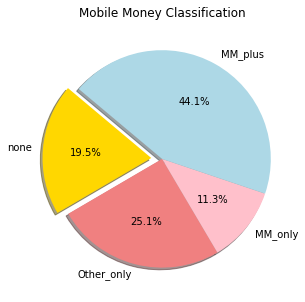

In [77]:
# Classification
none = len(mob_mon[mob_mon.mobile_money_classification == 0])
other_only = len(mob_mon[mob_mon.mobile_money_classification == 1])
MM_only = len(mob_mon[mob_mon.mobile_money_classification == 2])
MM_plus = len(mob_mon[mob_mon.mobile_money_classification == 3])

# Summation
total_c = none + other_only + MM_only + MM_plus

# Plotting Mobile Money Classification and Mobile Money
# Calculate piechart sizes
none_ = none / total_c * 100
other_only_ = other_only / total_c * 100
MM_only_ = MM_only / total_c * 100
MM_plus_ = MM_plus / total_c * 100

# Define the piechart
plt.figure(figsize=(10,5))
labels = ['none', 'Other_only', 'MM_only', 'MM_plus']
sizes = [none_, other_only_, MM_only_, MM_plus_]
colors = ['gold', 'lightcoral', 'pink', 'lightblue']
explode = (0.1, 0, 0, 0)

# Plot the pie chart
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Mobile Money Classification')
plt.show()

In [82]:
mob_mon_incomes = mob_mon[["Q8_1" ,"Q8_2","Q8_3","Q8_4","Q8_5","Q8_6","Q8_7","Q8_8","Q8_9","Q8_10","Q8_11"]] 

income_type = {
    "Q8_1":'Salaries/wages',
    "Q8_2":'trading/selling',
    "Q8_3":'service',
    "Q8_4":'Piece work/Casual labor/Occasional jobs',
    "Q8_5":'Rental income',
    "Q8_6":'Interest',
    "Q8_7":'Pension',
    "Q8_8":'Social welfare money/grant from Government',
    "Q8_9":'Rely on someone',
    "Q8_10":'Don’t get money',
    "Q8_11": 'Other'
}

for column,label in income_type.items():
    mob_mon_incomes[column] = [label if each ==1 else 'none' for each in mob_mon_incomes[column]]
mob_mon_incomes.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11
0,none,none,none,none,none,none,none,none,Rely on someone,none,none


In [83]:
x = [1,2,3,2,2,2,3,4]
def remove_none(whatever):
    return [x for x in whatever if x != "none"]

income = []
for index, row in mob_mon_incomes.iterrows():
    # this will give you a list of values in your row.
    row = list(row)

    # you want to remove all "none" values from your list.
    nfl = remove_none(row)

    # *if* your list is empty after the process of elimination, you want to append "No income".
    if len(nfl) == 0:
        nfl.append("No income")
    
    income.append(nfl)

mob_mon['income type'] = income

In [84]:
mob_mon = mob_mon.head(50)

In [85]:
import sys
#!{sys.executable} -m pip install folium --user
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster

In [86]:
# Creating a map for tanzania.
lat = -6.3728253; 
lon = 34.8924826
income_type_map = folium.Map(location = [lat, lon], zoom_start = 5)
marker_cluster = MarkerCluster().add_to(income_type_map)

# add markers to map
for lat, lng, label in zip(mob_mon['Latitude'], mob_mon['Longitude'], 
                           mob_mon['income type']):
    label = folium.Popup(str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#3386cc',
        fill_opacity=0.7,
        parse_html=False).add_to(marker_cluster)  

income_type_map
